In [3]:
from PIL import Image as img
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
lena=img.open('lena.bmp')
lena_arr = np.asarray(lena)

In [100]:
def SNR(origin,lena):
    m=len(origin)
    n=len(origin[0])
    mu=0
    mu_n=0
    for i in range(m):
        for j in range(n):
            mu+=origin[i][j]
            mu_n+=lena[i][j]-origin[i][j]
    mu/=m*n
    mu_n/=m*n
    vs=0
    vn=0
    for i in range(m):
        for j in range(n):
            vs+=(origin[i][j]-mu)**2
            vn+=(lena[i][j]-origin[i][j]-mu_n)**2
    vs/=m*n
    vn/=m*n
    return 20*np.log10((vs**0.5)/(vn**0.5))

In [111]:
20*np.log10(5)

13.979400086720377

In [73]:
def expan(arr):
    m=len(arr)
    n=len(arr[0])
    res=[[0]*(n+2) for i in range(m+2)]
    for i in range(1,m+1):
        res[i][0]=arr[i-1][0]
        res[i][n+1]=arr[i-1][n-1]
    for j in range(1,n+1):
        res[0][j]=arr[0][j-1]
        res[m+1][j]=arr[m-1][j-1]
    res[0][0]=arr[0][0]
    res[0][n+1]=arr[0][n-1]
    res[m+1][0]=arr[m-1][0]
    res[m+1][n+1]=arr[m-1][n-1]
    for i in range(1,m+1):
        for j in range(1,n+1):
            res[i][j]=arr[i-1][j-1]
    return res

In [5]:
def gaussian_noise(lena,amplitude):
    m=len(lena)
    n=len(lena[0])
    res=[[0]*n for i in range(m)]
    for i in range(m):
        for j in range(n):
            res[i][j]=max(0,min(255,lena[i][j]+amplitude*random.gauss(0,1)))
    return res

In [177]:
a=gaussian_noise(np.array(lena_arr,dtype='int'),10)
img.fromarray(np.array(a,dtype='uint8'))
a1=np.array(a)/255
print(SNR(np.array(lena_arr,dtype='int')/255,a1))

13.613050604442405


In [178]:
b=gaussian_noise(np.array(lena_arr,dtype='int'),30)
img.fromarray(np.array(b,dtype='uint8'))
a1=np.array(b)/255
print(SNR(np.array(lena_arr,dtype='int')/255,a1))

4.165773474872531


In [15]:
def s_and_p_noise(lena,theshold):
    m=len(lena)
    n=len(lena[0])
    res=[[0]*n for i in range(m)]
    for i in range(m):
        for j in range(n):
            tmp=random.random()
            if tmp<theshold:
                res[i][j]=0
            elif tmp>1-theshold:
                res[i][j]=255
            else:
                res[i][j]=lena[i][j]
    return res

In [187]:
c=s_and_p_noise(np.array(lena_arr,dtype='int'),0.05)
img.fromarray(np.array(c,dtype='uint8'))
a1=np.array(c)/255
print(SNR(np.array(lena_arr,dtype='int')/255,a1))

0.9043074295390112


In [202]:
d=s_and_p_noise(np.array(lena_arr,dtype='int'),0.1)
img.fromarray(np.array(d,dtype='uint8'))
a1=np.array(d)/255
print(SNR(np.array(lena_arr,dtype='int')/255,a1))

-2.096958344140055


In [161]:
def box_filter3(lena):
    m=len(lena)
    n=len(lena[0])
    lena=expan(lena)
    res=[[0]*n for i in range(m)]
    for i in range(m):
        tmp=lena[i][0]+lena[i+1][0]+lena[i+2][0]+lena[i][1]+lena[i+1][1]+lena[i+2][1]+lena[i][2]+lena[i+1][2]+lena[i+2][2]
        res[i][0]=tmp//9
        for j in range(1,n):
            tmp-=lena[i][j-1]+lena[i+1][j-1]+lena[i+2][j-1]
            tmp+=lena[i][j+2]+lena[i+1][j+2]+lena[i+2][j+2]
            res[i][j]=tmp//9
    return res

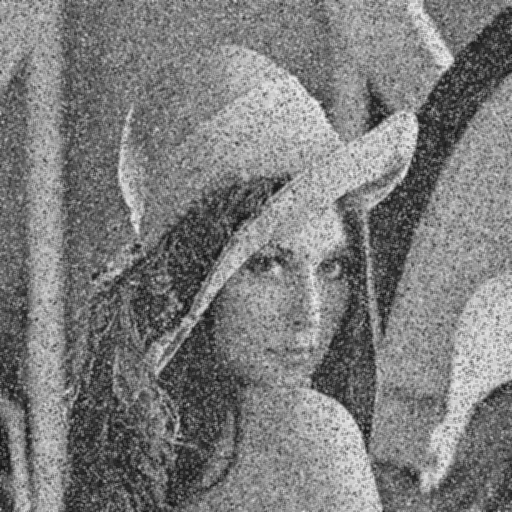

In [33]:
box3d=box_filter3(a)
img.fromarray(np.array(box3d,dtype='uint8'))
box3d=box_filter3(b)
img.fromarray(np.array(box3d,dtype='uint8'))
box3d=box_filter3(c)
img.fromarray(np.array(box3d,dtype='uint8'))
box3d=box_filter3(d)
img.fromarray(np.array(box3d,dtype='uint8'))

In [208]:
box3d=box_filter3(d)
img.fromarray(np.array(box3d,dtype='uint8'))
box3d=np.array(box3d)/255
print(SNR(np.array(lena_arr,dtype='int')/255,box3d))

6.352908846735206


In [94]:
def box_filter5(lena):
    m=len(lena)
    n=len(lena[0])
    lena=expan(lena)
    lena=expan(lena)
    res=[[0]*n for i in range(m)]
    for i in range(m):
        tmp=lena[i][0]+lena[i+1][0]+lena[i+2][0]+lena[i+3][0]+lena[i+4][0]
        tmp+=lena[i][1]+lena[i+1][1]+lena[i+2][1]+lena[i+3][1]+lena[i+4][1]
        tmp+=lena[i][2]+lena[i+1][2]+lena[i+2][2]+lena[i+3][2]+lena[i+4][2]
        tmp+=lena[i][3]+lena[i+1][3]+lena[i+2][3]+lena[i+3][3]+lena[i+4][3]
        tmp+=lena[i][4]+lena[i+1][4]+lena[i+2][4]+lena[i+3][4]+lena[i+4][4]
        res[i][0]=tmp//25
        for j in range(1,n):
            tmp-=lena[i][j-1]+lena[i+1][j-1]+lena[i+2][j-1]+lena[i+3][j-1]+lena[i+4][j-1]
            tmp+=lena[i][j+4]+lena[i+1][j+4]+lena[i+2][j+4]+lena[i+3][j+4]+lena[i+4][j+4]
            res[i][j]=tmp//25
    return res

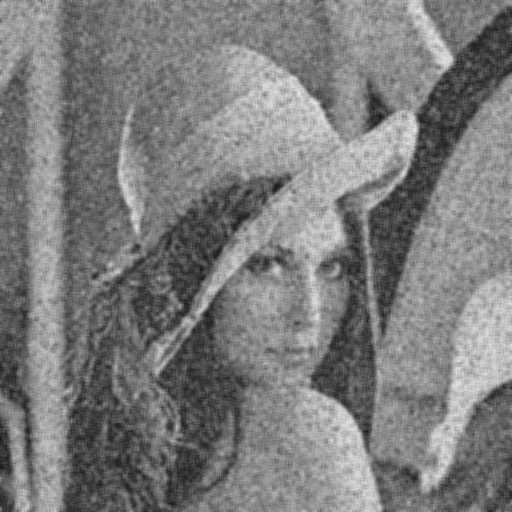

In [95]:
box3d=box_filter5(a)
img.fromarray(np.array(box3d,dtype='uint8'))
box3d=box_filter5(b)
img.fromarray(np.array(box3d,dtype='uint8'))
box3d=box_filter5(c)
img.fromarray(np.array(box3d,dtype='uint8'))
box3d=box_filter5(d)
img.fromarray(np.array(box3d,dtype='uint8'))

In [207]:
box3d=box_filter5(d)
img.fromarray(np.array(box3d,dtype='uint8'))
box3d=np.array(box3d)/255
print(SNR(np.array(lena_arr,dtype='int')/255,box3d))

8.531548329792468


In [141]:
def med_filter3(lena):
    m=len(lena)
    n=len(lena[0])
    lena=expan(lena)
    res=[[0]*n for i in range(m)]
    for i in range(m):
        for j in range(n):
            res[i][j]=sorted(lena[i][j:j+3]+lena[i+1][j:j+3]+lena[i+2][j:j+3])[4]
    return res

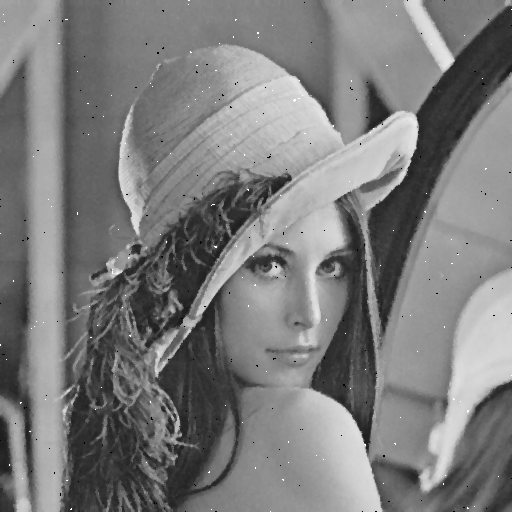

In [197]:
box3d=med_filter3(a)
img.fromarray(np.array(box3d,dtype='uint8'))
box3d=med_filter3(b)
img.fromarray(np.array(box3d,dtype='uint8'))
box3d=med_filter3(c)
img.fromarray(np.array(box3d,dtype='uint8'))
box3d=med_filter3(d)
img.fromarray(np.array(box3d,dtype='uint8'))

In [206]:
box3d=med_filter3(d)
img.fromarray(np.array(box3d,dtype='uint8'))
box3d=np.array(box3d)/255
print(SNR(np.array(lena_arr,dtype='int')/255,box3d))

15.075991095244232


In [136]:
def med_filter5(lena):
    m=len(lena)
    n=len(lena[0])
    lena=expan(lena)
    lena=expan(lena)
    res=[[0]*n for i in range(m)]
    for i in range(m):
        for j in range(n):
            res[i][j]=sorted(lena[i][j:j+5]+lena[i+1][j:j+5]+lena[i+2][j:j+5]+lena[i+3][j:j+5]+lena[i+4][j:j+5])[12]
    return res

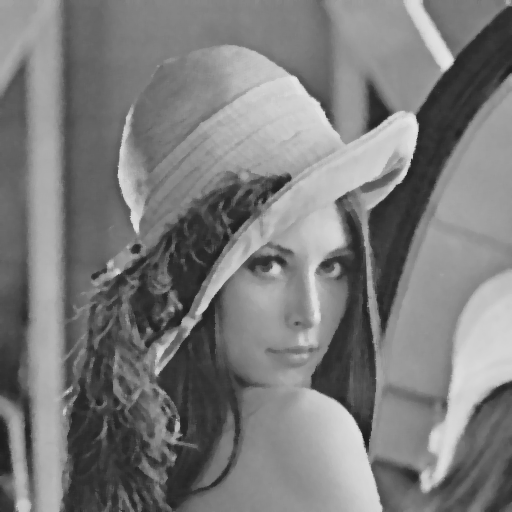

In [137]:
box3d=med_filter5(a)
img.fromarray(np.array(box3d,dtype='uint8'))
box3d=med_filter5(b)
img.fromarray(np.array(box3d,dtype='uint8'))
box3d=med_filter5(c)
img.fromarray(np.array(box3d,dtype='uint8'))
box3d=med_filter5(d)
img.fromarray(np.array(box3d,dtype='uint8'))

In [205]:
box3d=med_filter5(d)
img.fromarray(np.array(box3d,dtype='uint8'))
box3d=np.array(box3d)/255
print(SNR(np.array(lena_arr,dtype='int')/255,box3d))

15.74572573325548


In [61]:
def Dilation(lena,mask):
    m=len(mask)
    n=len(mask[0])
    mm=len(lena)
    nn=len(lena[0])
    res=[[0]*nn for i in range(mm)]
    for i in range(m//2,mm-m//2):
        for j in range(n//2,nn-n//2):
            tmp=0
            for k in range(m):
                for l in range(n):
                    if mask[k][l]==1:
                        tmp=max(tmp,lena[i-(m//2-k)][j-(n//2-l)])
            res[i][j]=tmp
    return res
def Erosion(lena,mask):
    m=len(mask)
    n=len(mask[0])
    mm=len(lena)
    nn=len(lena[0])
    res=[[0]*nn for i in range(mm)]
    for i in range(m//2,mm-m//2):
        for j in range(n//2,nn-n//2):
            tmp=255
            for k in range(m):
                for l in range(n):
                    if mask[k][l]==1:
                        tmp=min(tmp,lena[i-(m//2-k)][j-(n//2-l)])
            res[i][j]=tmp
    return res
def Opening(lena,mask):
    return Dilation(Erosion(lena,mask),mask)
def Closing(lena,mask):
    return Erosion(Dilation(lena,mask),mask)
mask1=[[0,1,1,1,0],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[0,1,1,1,0]]
alex=Closing(Opening(lena_arr,mask1),mask1)
blex=Opening(Closing(lena_arr,mask1),mask1)

In [203]:
coa=Closing(Opening(d,mask1),mask1)
img.fromarray(np.array(coa,dtype='uint8'))
box3d=np.array(coa)/255
print(SNR(np.array(lena_arr,dtype='int')/255,box3d))

-2.3192932549702623


In [204]:
oca=Opening(Closing(d,mask1),mask1)
img.fromarray(np.array(oca,dtype='uint8'))
box3d=np.array(oca)/255
print(SNR(np.array(lena_arr,dtype='int')/255,box3d))

-3.2127249492740066


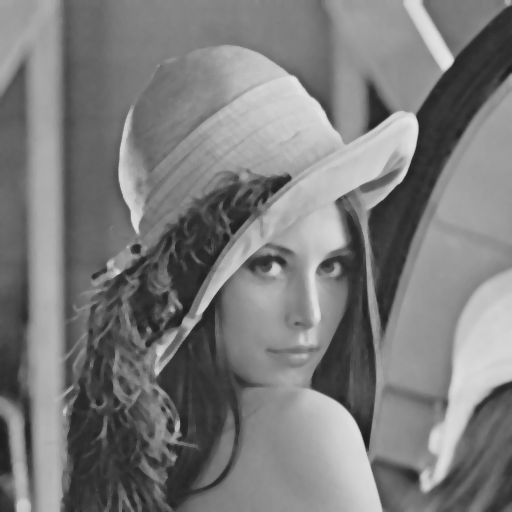

In [138]:
box3d=med_filter5(np.array(lena_arr,dtype='int'))
img.fromarray(np.array(box3d,dtype='uint8'))

In [139]:
box3d=np.array(box3d)/255
print(SNR(np.array(lena_arr,dtype='int')/255,box3d))

16.86303173264494


In [146]:
box3d=med_filter5(np.array(a))
box3d=np.array(box3d)/255
print(SNR(np.array(lena_arr,dtype='int')/255,box3d))
box3d=med_filter5(np.array(b))
box3d=np.array(box3d)/255
print(SNR(np.array(lena_arr,dtype='int')/255,box3d))
box3d=med_filter5(np.array(c))
box3d=np.array(box3d)/255
print(SNR(np.array(lena_arr,dtype='int')/255,box3d))
box3d=med_filter5(np.array(d))
box3d=np.array(box3d)/255
print(SNR(np.array(lena_arr,dtype='int')/255,box3d))

15.987451428759318
12.883244798361593
16.368641138143957
15.752700729780987


In [121]:
noise=img.open('median_5x5 (1).bmp')
noise = np.asarray(noise)

In [134]:
print(SNR(np.array(lena_arr,dtype='int')/255,noise/255))

15.673697071703499
